Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Mercury'... 
Found: Mercury Barycenter (199) (chosen from query 'Mercury')
Searching NASA Horizons for 'Venus'... 
Found: Venus Barycenter (299) (chosen from query 'Venus')
Searching NASA Horizons for 'Earth'... 
Found: Earth-Moon Barycenter (3) (chosen from query 'Earth')
Searching NASA Horizons for 'Mars'... 
Found: Mars Barycenter (4) (chosen from query 'Mars')
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Uranus'... 
Found: Uranus Barycenter (7) (chosen from query 'Uranus')
Searching NASA Horizons for 'Neptune'... 
Found: Neptune Barycenter (8) (chosen from query 'Neptune')


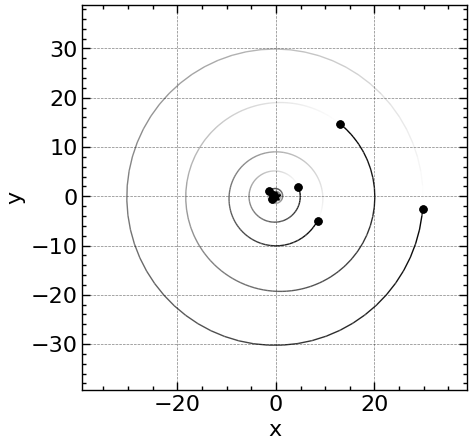

In [66]:
import rebound
%matplotlib inline

sim = rebound.Simulation()
sim.add('Sun')
sim.add('Mercury')
sim.add('Venus')
sim.add('Earth')
sim.add('Mars')
sim.add('Jupiter')
sim.add('Saturn')
sim.add('Uranus')
sim.add('Neptune')

sim.move_to_com()
fig = rebound.OrbitPlot(sim)

In [67]:
from spock import FeatureClassifier
model = FeatureClassifier()

[21:06:06] WARNING: ../src/learner.cc:749: Found JSON model saved before XGBoost 1.6, please save the model using current version again. The support for old JSON model will be discontinued in XGBoost 2.3.


In [68]:
%%time
model.predict_stable(sim)

CPU times: user 1.11 s, sys: 5.92 ms, total: 1.12 s
Wall time: 1.1 s


0.9274143

In [69]:
model.generate_features(sim)

([OrderedDict([('EMcrossnear', 0.38251724723972336),
               ('EMfracstdnear', 0.0005966852584765967),
               ('EPstdnear', 0.0002702859828758828),
               ('MMRstrengthnear', 0.0008749003850390472),
               ('EMcrossfar', 0.8685832007048905),
               ('EMfracstdfar', 0.0002505472182846355),
               ('EPstdfar', 0.00015400872028190356),
               ('MMRstrengthfar', nan),
               ('MEGNO', 2.002184913924017),
               ('MEGNOstd', 0.00014804853310388777)]),
  OrderedDict([('EMcrossnear', 0.38251724723972336),
               ('EMfracstdnear', 0.0005966852584765967),
               ('EPstdnear', 0.0002702859828758828),
               ('MMRstrengthnear', 0.0008749003850390472),
               ('EMcrossfar', 0.5236167040490927),
               ('EMfracstdfar', 0.0004608935484147834),
               ('EPstdfar', 9.428236223371159e-05),
               ('MMRstrengthfar', nan),
               ('MEGNO', 2.002184913924017),
            

In [70]:
from spock import DeepRegressor
deepmodel = DeepRegressor()

In [71]:
%%time
median, lower, upper, samples = deepmodel.predict_instability_time(sim, return_samples=True)

CPU times: user 39.1 s, sys: 12 s, total: 51.1 s
Wall time: 8.92 s


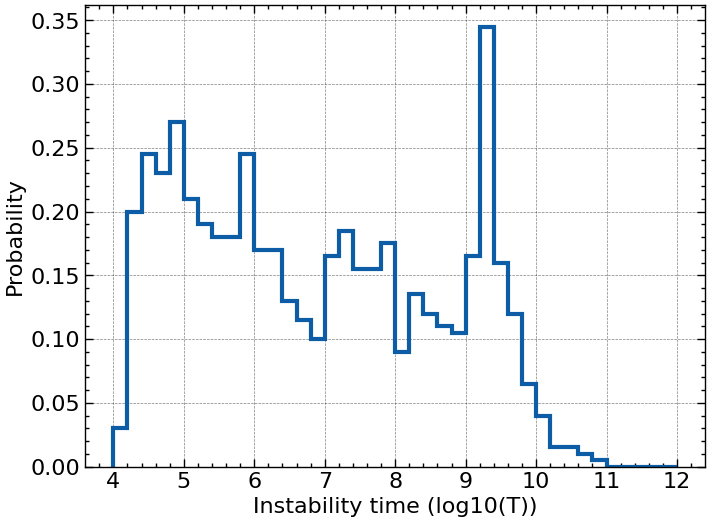

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])
%matplotlib inline

fig, ax = plt.subplots()
ax.hist(np.log10(samples), density=True,
            histtype=u'step', bins=40,
            range=(4, 12), lw=3);

plt.ylabel('Probability')
plt.xlabel('Instability time (log10(T))')
plt.show()

In [76]:
print("Median instability time = {0:.3e} orbits\n16th percentile instability time = {1:.3e} orbits\n84th percentile instability time = {2:.3e} orbits".format(median, lower, upper))

Median instability time = 4.730e+06 orbits
16th percentile instability time = 7.172e+04 orbits
84th percentile instability time = 1.527e+09 orbits


In [78]:
from spock import AnalyticalClassifier
analyticalmodel = AnalyticalClassifier()

In [79]:
%%time
prob = analyticalmodel.predict_stable(sim)
print("Probability of regular (non-chaotic) motion: {0:.2f}".format(prob))

Probability of regular (non-chaotic) motion: 0.60
CPU times: user 42.8 s, sys: 1.03 s, total: 43.8 s
Wall time: 42.4 s
